In [55]:
import pandas as pd
df=pd.read_csv(r"C:\Users\DELL\email-spam-detection\spam.csv",encoding="latin-1")

In [56]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [57]:
df.shape

(5572, 5)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [59]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [60]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [61]:
df.duplicated().sum()

np.int64(403)

In [62]:
df=df.drop_duplicates(keep="first")

In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
df.shape

(5169, 2)

In [65]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20696\3235267346.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [67]:
# here the class is imbalanced
df["target"].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

In [68]:
import plotly.express as px

target_counts = df["target"].value_counts().reset_index()
fig = px.pie(target_counts, names='target', values='count', title='Target Class Distribution',hole=0.2)
fig.update_layout(
    width = 350,
    height =400
)
fig.show()


In [69]:
df.head(4)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [70]:
import nltk
nltk.download('punkt')  # This is for word and sentence tokenization.
nltk.download('punkt_tab')  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [71]:
df["num_char"]=df["text"].apply(len)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20696\2998575865.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
from nltk.tokenize import word_tokenize
df["num_of_words"]=df["text"].apply(lambda x: len(word_tokenize(x)))

C:\Users\DELL\AppData\Local\Temp\ipykernel_20696\2796246034.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
df.head(3)

,target,text,num_char,num_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [74]:
from nltk.tokenize import sent_tokenize
df["num_of_sent"]=df["text"].apply(lambda x: len(sent_tokenize(x)))

C:\Users\DELL\AppData\Local\Temp\ipykernel_20696\2760002070.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
df

,target,text,num_char,num_of_words,num_of_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["target"]=le.fit_transform(df["target"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20696\4225924073.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
df 
# 0 ham and 1 spam

,target,text,num_char,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [78]:
ham_class=df[df["target"]==0][["num_of_words","num_of_sent","num_char"]]
spam_class=df[df["target"]==1][["num_of_words","num_of_sent","num_char"]]


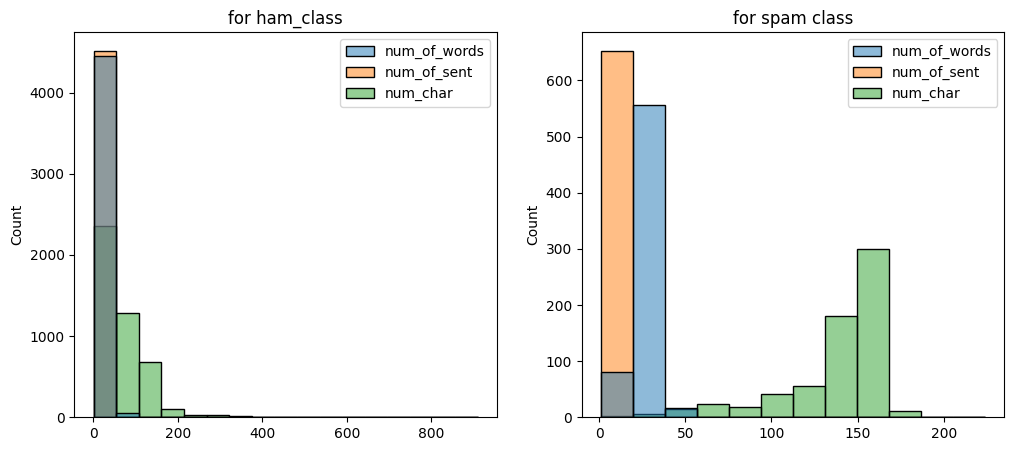

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
fig ,ax =plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=ham_class,ax=ax[0],bins=17)
ax[0].set_title("for ham_class")
sns.histplot(spam_class,ax=ax[1])
ax[1].set_title("for spam class")
plt.show()

<Axes: xlabel='num_of_words', ylabel='Count'>

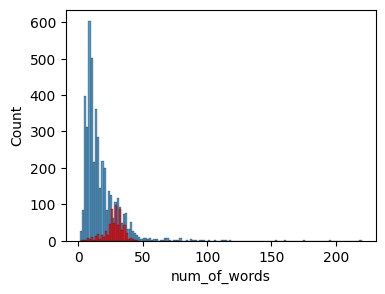

In [80]:
plt.subplots(figsize=(4,3))
sns.histplot(df[df["target"]==0],x="num_of_words") # for ham
sns.histplot(df[df["target"]==1],x="num_of_words",color="red") #for spam

<Axes: xlabel='num_char', ylabel='Count'>

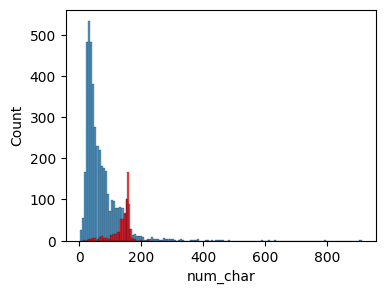

In [81]:
plt.subplots(figsize=(4,3))
sns.histplot(df[df["target"]==0],x="num_char") # for ham
sns.histplot(df[df["target"]==1],x="num_char",color="red") #for spam

In [82]:

sns.pairplot(df,hue="target")

Error in callback <function flush_figures at 0x000002B4A0C95940> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
df.columns

Index(['target', 'text', 'num_char', 'num_of_words', 'num_of_sent'], dtype='object')

<Axes: >

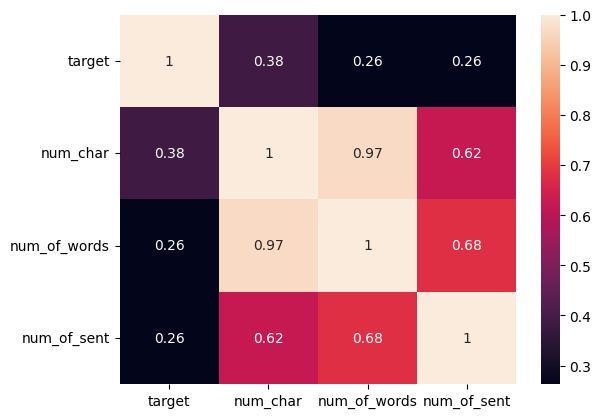

In [ ]:
import pandas as pd
num_df=df.drop("text",axis=1)
sns.heatmap(num_df.corr(),annot=True)
# here we can take num_char cuz of high corr than other column with target

In [ ]:
df.sample(4)

,target,text,num_char,num_of_words,num_of_sent
3326,0,what number do u live at? Is it 11?,36,11,2
2120,0,"Argh my 3g is spotty, anyway the only thing I ...",157,30,1
1302,0,FRAN I DECIDED 2 GO N E WAY IM COMPLETELY BROK...,132,32,1
3090,1,LORD OF THE RINGS:RETURN OF THE KING in store ...,140,32,2


In [ ]:
df.drop(columns=["num_of_words","num_of_sent"],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20696\160359869.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
import string
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in tokens]
    
    #  Join back to string
    return " ".join(stemmed)


In [ ]:
df["text"]=df["text"].apply(lambda x:clean_text(x))

C:\Users\DELL\AppData\Local\Temp\ipykernel_20696\654313331.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
shortcuts = {
    'u': 'you',
    'r': 'are',
    'ur': 'your',
    'btw': 'by the way',
    'omg': 'oh my god',
    'idk': "I don't know",
    'brb': 'be right back',
    'lol': 'laughing out loud',
    'asap': 'as soon as possible',
    'ttyl': 'talk to you later',
    'gr8': 'great',
    'b4': 'before',
    'l8r': 'later',
    'bcoz': 'because',
    'plz': 'please',
    'thx': 'thanks',
    'tnx': 'thanks',
    'np': 'no problem',
    'k': 'okay',
    'ok': 'okay',
    'msg': 'message',
    'txt': 'text',
    'cya': 'see you',
    'dm': 'direct message',
    'fyi': 'for your information',
    'atm': 'at the moment',
    'imo': 'in my opinion',
    'jk': 'just kidding',
    'nvm': 'never mind',
    'rofl': 'rolling on the floor laughing',
    'ya': 'yeah',
    'thx': 'thanks',
    'gn': 'good night',
    'gm': 'good morning',
    'tc': 'take care'
}

def shortcut_conv(text):
    text=text.split( )
    return " ".join([shortcuts.get(word.lower() , word) for word in text ])

In [ ]:
df["text"]=df["text"].apply(lambda x: shortcut_conv(x))

C:\Users\DELL\AppData\Local\Temp\ipykernel_20696\2887979338.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



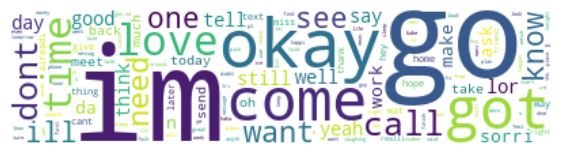

In [ ]:
from wordcloud import WordCloud
text=df[df["target"] == 0]["text"].str.cat(sep=" ")
wc=WordCloud(width=400,height=100,background_color="white").generate(text)
plt.figure(figsize=(7,5))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

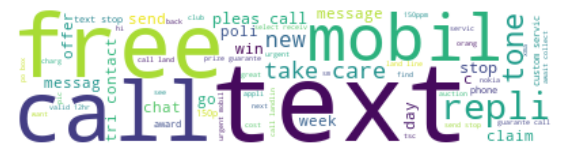

In [ ]:
from wordcloud import WordCloud
text=df[df["target"] == 1]["text"].str.cat(sep=" ")
wc=WordCloud(width=400,height=100,background_color="white").generate(text)
plt.figure(figsize=(7,5))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
spam_corpus=[]
for msg in df[df["target"]==1]["text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 321),
 ('text', 258),
 ('free', 189),
 ('2', 155),
 ('you', 123),
 ('your', 121),
 ('mobil', 114),
 ('stop', 103),
 ('repli', 100),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('tone', 62),
 ('take', 60),
 ('send', 59),
 ('urgent', 58),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('care', 50),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('collect', 44),
 ('min', 44)]

In [ ]:
spam_df=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [ ]:
spam_df.head()

,0,1
0,call,321
1,text,258
2,free,189
3,2,155
4,you,123


In [ ]:

import plotly.express as px
fig=px.bar(spam_df,x=0,y=1,title="for_spam")
fig.update_layout(width=550,height=350)
fig.show()

In [ ]:
ham_corpus=[]
for msg in df[df["target"]==0]["text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
from collections import Counter
Counter(ham_corpus).most_common(30)
ham_df=pd.DataFrame(Counter(ham_corpus).most_common(30))


In [ ]:
ham_df.head()

,0,1
0,you,884
1,im,435
2,go,401
3,get,352
4,okay,340


In [ ]:
import plotly.express as px
fig=px.bar(ham_df,x=0,y=1,title="for_ham")
fig.update_layout(width=550,height=350)
fig.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vec=TfidfVectorizer(max_features=3500)
x=vec.fit_transform(df["text"]).toarray()



In [ ]:
x.shape

(5169, 3500)

In [ ]:
y=df["target"].values

In [ ]:
# x=pd.DataFrame(vectorized,columns=vec.get_feature_names_out()).sample(5)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
%matplotlib inline
import os
import pickle
import mlflow.sklearn
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


# .png saving folder
report_dir = "C:/dekstop/EMAIL-SPAM-DETECTION/reports/figure"

os.makedirs(report_dir, exist_ok=True)

cm_file = f"{report_dir}/confusion_matrix.png"

# mlflow setup
mlflow.set_tracking_uri("http://127.0.0.1:5000")

mlflow.set_experiment("multiple_experiment_for_best_model")

# -------------------------
# Train & log model
# -------------------------
with mlflow.start_run(run_name="baseline_model"):
    lr = LogisticRegression(max_iter=200, solver="liblinear", random_state=42)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.savefig(cm_file)
    plt.close()

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)


    # Log to MLflow
    mlflow.log_metrics({"accuracy": accuracy, "precision": precision})
    mlflow.log_params({
        "max_iter": 200,
        "solver": "liblinear",
        "random_state": 42,
        "model": "LogisticRegression"
    })
    mlflow.sklearn.log_model(lr,"logistic_regression")
    mlflow.log_artifact(cm_file)
    mlflow.set_tag("author", "shoiab")

print(" Model, metrics, and confusion matrix logged successfully in Jupyter Notebook.")


2025/08/28 09:39:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 09:39:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run baseline_model at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/15151e4a59f84a54ab0d535aebbb63c1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
 Model, metrics, and confusion matrix logged successfully in Jupyter Notebook.


In [87]:
import mlflow
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import itertools

mlflow.set_tracking_uri("http://127.0.0.1:5000")

# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Install these if not already installed
# pip install xgboost lightgbm catboost

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 2️⃣ Models and hyperparameter grids
models = {
    'KNN': {
        'model': KNeighborsClassifier,
        'params': {
            'n_neighbors': [3, 5],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier,
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression,
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear']
        }
    },
    'SVC': {
        'model': SVC,
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'GaussianNB': {
        'model':  MultinomialNB,
        'params': {
            # multinomialNB has few hyperparameters, can leave empty or add var_smoothing
        }
    },
    'XGBoost': {
        'model': XGBClassifier,
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5],
            'learning_rate': [0.1, 0.01],
            'use_label_encoder':[False],
            'eval_metric':['logloss']
        }
    },
    'LightGBM': {
        'model': LGBMClassifier,
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5],
            'learning_rate': [0.1, 0.01]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier,
        'params': {
            'iterations': [50, 100],
            'depth': [3, 5],
            'learning_rate': [0.1, 0.01],
            'verbose': [0]  # Silent mode
        }
    }
}

# 3️⃣ MLflow parent run (overall experiment)
with mlflow.start_run(run_name="All Classifiers Hyperparameter Search") as parent_run:
    
    best_model = None
    best_score = 0
    best_model_name = ""
    best_params = {}
    
    # 4️⃣ Loop over models
    for model_name, model_info in models.items():
        ModelClass = model_info['model']
        param_grid = model_info['params']
        
        # Generate all hyperparameter combinations
        if param_grid:  # If there are hyperparameters
            keys, values = zip(*param_grid.items())
            combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
        else:
            combinations = [{}]  # For models like GaussianNB with default params
        
        # 5️⃣ Loop over hyperparameter combinations → child run
        for params in combinations:
            with mlflow.start_run(run_name=f"{model_name} {params}", nested=True):
                # Initialize and train model
                model = ModelClass(**params)
                model.fit(x_train, y_train)
                y_pred = model.predict(x_test)
                
                # Calculate metric
                acc = accuracy_score(y_test, y_pred)
                prec=precision_score(y_test,y_pred)
                
                # Log params and metric
                mlflow.log_params(params)
                mlflow.log_metric("accuracy", acc)
                mlflow.log_metric("precision",prec)
                
                # Track best model
                if acc > best_score:
                    best_score = acc
                    best_model = model
                    best_model_name = model_name
                    best_params = params

# 6️⃣ Print best model summary
print(f"Best Model: {best_model_name}")
print(f"Best Params: {best_params}")
print(f"Best Accuracy: {best_score}")


🏃 View run KNN {'n_neighbors': 3, 'weights': 'uniform', 'p': 1} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/baf20a61020a497db1dc73a502d010d4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
🏃 View run KNN {'n_neighbors': 3, 'weights': 'uniform', 'p': 2} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/76e89f10913444f7be19e8c0d618c2f1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
🏃 View run KNN {'n_neighbors': 3, 'weights': 'distance', 'p': 1} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/e124eebb184747848d07a6ebabbfea37
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
🏃 View run KNN {'n_neighbors': 3, 'weights': 'distance', 'p': 2} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/c22064b056534226b902b15a8c838e1c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
🏃 View run KNN {'n_neighbors': 5, 'weights': '

c:\dekstop\email-spam-detection\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[11:11:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




🏃 View run XGBoost {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'use_label_encoder': False, 'eval_metric': 'logloss'} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/8e479847c52b4a61a3c6e07d387b0d23
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930


c:\dekstop\email-spam-detection\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[11:11:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\dekstop\email-spam-detection\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



🏃 View run XGBoost {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01, 'use_label_encoder': False, 'eval_metric': 'logloss'} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/ebe4ec3a68c64a12bcb6d56fed64fc08
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930


c:\dekstop\email-spam-detection\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[11:11:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




🏃 View run XGBoost {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'use_label_encoder': False, 'eval_metric': 'logloss'} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/f5659f9d16df4a279999691e0dc2e837
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930


c:\dekstop\email-spam-detection\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[11:11:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\dekstop\email-spam-detection\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



🏃 View run XGBoost {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.01, 'use_label_encoder': False, 'eval_metric': 'logloss'} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/2300185bc3964001b94b158cd0f08342
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930


c:\dekstop\email-spam-detection\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[11:11:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




🏃 View run XGBoost {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'use_label_encoder': False, 'eval_metric': 'logloss'} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/872330f66a134347b76cafe17e71d21f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930


c:\dekstop\email-spam-detection\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[11:11:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




🏃 View run XGBoost {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'use_label_encoder': False, 'eval_metric': 'logloss'} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/dbb478e14a8341bcaafe673ddc61ecef
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930


c:\dekstop\email-spam-detection\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[11:11:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




🏃 View run XGBoost {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'use_label_encoder': False, 'eval_metric': 'logloss'} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/1a14f7e7ecce4e4f9ed5183136ee0b28
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930


c:\dekstop\email-spam-detection\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[11:11:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




🏃 View run XGBoost {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'use_label_encoder': False, 'eval_metric': 'logloss'} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/586dc4fc1f9d4d1a83c2b1252d0d0fd1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
[LightGBM] [Info] Number of positive: 508, number of negative: 3627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6814
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 345
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122854 -> initscore=-1.965680
[LightGBM] [Info] Start training from score -1.965680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

c:\dekstop\email-spam-detection\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



🏃 View run LightGBM {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/24b279d9039e4f95a3c5cfb4fe9bc5ac
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
[LightGBM] [Info] Number of positive: 508, number of negative: 3627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6814
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 345
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122854 -> initscore=-1.965680
[LightGBM] [Info] Start training from score -1.965680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

c:\dekstop\email-spam-detection\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

c:\dekstop\email-spam-detection\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



[LightGBM] [Info] Number of positive: 508, number of negative: 3627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6814
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 345
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122854 -> initscore=-1.965680
[LightGBM] [Info] Start training from score -1.965680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

c:\dekstop\email-spam-detection\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



🏃 View run LightGBM {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/38043a88f528409f88274c8f0b8786c5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
[LightGBM] [Info] Number of positive: 508, number of negative: 3627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6814
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 345
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122854 -> initscore=-1.965680
[LightGBM] [Info] Start training from score -1.965680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

c:\dekstop\email-spam-detection\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



🏃 View run LightGBM {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.01} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/92be0caa09e14da7a016f8199f6e2cc3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
[LightGBM] [Info] Number of positive: 508, number of negative: 3627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6814
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 345
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122854 -> initscore=-1.965680
[LightGBM] [Info] Start training from score -1.965680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\dekstop\email-spam-detection\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



🏃 View run LightGBM {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/0c7e4e2a321c4aec9118e35ab2e2e201
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
[LightGBM] [Info] Number of positive: 508, number of negative: 3627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6814
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 345
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122854 -> initscore=-1.965680
[LightGBM] [Info] Start training from score -1.965680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\dekstop\email-spam-detection\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



🏃 View run LightGBM {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/b903afb73a4541d9806d63b308a50731
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
[LightGBM] [Info] Number of positive: 508, number of negative: 3627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6814
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 345
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122854 -> initscore=-1.965680
[LightGBM] [Info] Start training from score -1.965680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

c:\dekstop\email-spam-detection\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



🏃 View run LightGBM {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/8f8afe02195e46c9a9dd56f3d6413f9a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
[LightGBM] [Info] Number of positive: 508, number of negative: 3627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6814
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 345
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122854 -> initscore=-1.965680
[LightGBM] [Info] Start training from score -1.965680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\dekstop\email-spam-detection\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



🏃 View run LightGBM {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/6f59ed9e84df4fb8afe98140a24d1a5a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
🏃 View run CatBoost {'iterations': 50, 'depth': 3, 'learning_rate': 0.1, 'verbose': 0} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/a41ca367d3614af3bcebbd048f716543
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
🏃 View run CatBoost {'iterations': 50, 'depth': 3, 'learning_rate': 0.01, 'verbose': 0} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/3c82e0acbb1041788dad0223d00e2396
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/319104582855334930
🏃 View run CatBoost {'iterations': 50, 'depth': 5, 'learning_rate': 0.1, 'verbose': 0} at: http://127.0.0.1:5000/#/experiments/319104582855334930/runs/a8555f5cdf12463cb0fab66d8c908a6b
🧪 View experiment at: http://127.0.0.1